In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [2]:
data_dir = '../UTKFace'
img_size = (48, 48)

def load_data(data_dir):
    images = []
    labels = []
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            label = int(filename.split('_')[1])
            img_path = os.path.join(data_dir, filename)
            image = Image.open(img_path).resize(img_size).convert('L')
            image = np.array(image)
            
            images.append(image)
            labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = load_data(data_dir)

images = images.astype('float32') / 255.0

images = np.expand_dims(images, -1)

labels = to_categorical(labels, 2)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.summary()


c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,202 (1.35 MB)

 Trainable params: 355,202 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_gender_classification_model.keras', 
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),callbacks=[checkpoint])


Epoch 1/50
592/593 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9252 - loss: 0.1755
Epoch 1: val_accuracy improved from 0.89414 to 0.89625, saving model to best_gender_classification_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9252 - loss: 0.1755 - val_accuracy: 0.8962 - val_loss: 0.2770
Epoch 2/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9310 - loss: 0.1605
Epoch 2: val_accuracy did not improve from 0.89625
593/593 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9310 - loss: 0.1605 - val_accuracy: 0.8908 - val_loss: 0.2845
Epoch 3/50
592/593 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9333 - loss: 0.1560
Epoch 3: val_accuracy did not improve from 0.89625
593/593 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9333 - loss: 0.1560 - val_accuracy: 0.8925 - val_loss: 0.2803
Epoch 4/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9397 - loss: 0.1380
Epoch 4: val_accuracy did not improve from 0.89625
593/593 ━━━━━━━━━━━━━━━━━━━━ 39

In [8]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8856 - loss: 0.2989
Validation accuracy: 88.38%


In [9]:
best_model = tf.keras.models.load_model('best_gender_classification_model.keras')


best_model.save('gender_classification_model.keras')

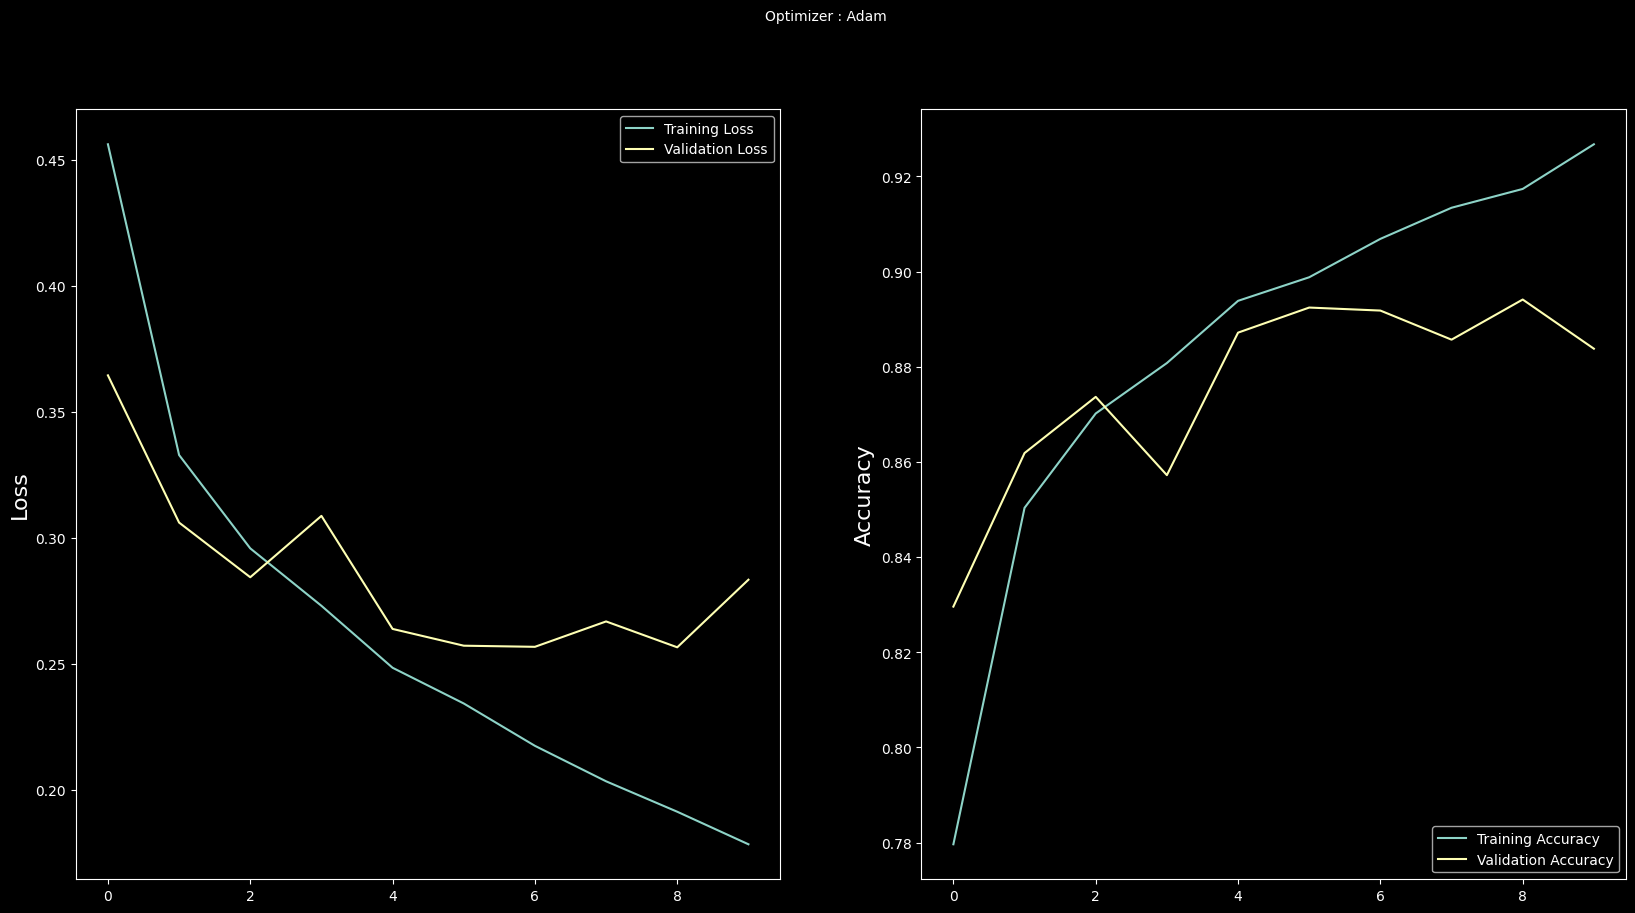

In [10]:
import matplotlib.pyplot as plt
from keras.models import load_model
model = best_model

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()